In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import matplotlib.patches as patches
import re
import random 
import pickle
import cv2
import seaborn as sns
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
train_csv=pd.read_csv('./input/train.csv')
train_csv.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [4]:
train_csv.shape

(7095, 3)

In [5]:
Image_id = []
label = []
train_folder_path = './input/train_images'
for i in os.listdir(train_folder_path):#https://www.geeksforgeeks.org/python-os-listdir-method/
    for j in range(1,5):
        Image_id.append(i)
        label.append(j)
        
x = {'ImageId' :Image_id, 'ClassId':label}      #https://www.geeksforgeeks.org/creating-a-pandas-dataframe/   
train_img = pd.DataFrame(x)
train_img.head(10)

,ImageId,ClassId
0,0002cc93b.jpg,1
1,0002cc93b.jpg,2
2,0002cc93b.jpg,3
3,0002cc93b.jpg,4
4,00031f466.jpg,1
5,00031f466.jpg,2
6,00031f466.jpg,3
7,00031f466.jpg,4
8,000418bfc.jpg,1
9,000418bfc.jpg,2


In [6]:
#https://www.geeksforgeeks.org/python-get-unique-values-list/
image_size = set()
train_folder_path = './input/train_images'
for i in os.listdir(train_folder_path):
    image_size.add(cv2.imread(train_folder_path+'/'+i).shape)
unique_image = list(image_size)
for x in unique_image:
    print(x)

(256, 1600, 3)


- Each image is 256*1600 resolution

In [7]:
#https://stackoverflow.com/questions/53645882/pandas-merging-10
df = pd.merge(train_img, train_csv, how='outer', on=['ImageId', 'ClassId'])
df.fillna('', inplace=True)
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg,2,
2,0002cc93b.jpg,3,
3,0002cc93b.jpg,4,
4,00031f466.jpg,1,


In [8]:
#https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/
train = pd.pivot_table(df, values='EncodedPixels', index='ImageId', columns='ClassId', aggfunc=np.sum).astype(str)
train = train.reset_index()
train.columns = ['image_id', 'rle_1', 'rle_2', 'rle_3', 'rle_4']
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,
1,00031f466.jpg,,,,
2,000418bfc.jpg,,,,
3,000789191.jpg,,,,
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,


- Stratified corrosion is a type of corrosion that progresses parallel to the metal surface in such a manner that underlying layers are gradually separated.
- For stratified sampling, we have taken stratified based on minority label priority
- https://economictimes.indiatimes.com/definition/stratified-sampling


In [9]:
defect=[]
stratify=[]
for i in range(len(train)):
    if (train['rle_1'][i] != '' or train['rle_2'][i] != '' or train['rle_3'][i] != '' or train['rle_4'][i] != ''):
        defect.append(1)
    else:
        defect.append(0)
    
    if train['rle_1'][i] != '':
        stratify.append(1)
    elif train['rle_2'][i] != '':
        stratify.append(2)
    elif train['rle_3'][i] != '':
        stratify.append(3)
    elif train['rle_4'][i] != '':
        stratify.append(4)
    else:
        stratify.append(0)
    
train['defect'] = defect
train['stratify'] = stratify

In [10]:
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1
1,00031f466.jpg,,,,,0,0
2,000418bfc.jpg,,,,,0,0
3,000789191.jpg,,,,,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3


In [11]:
defect_1,defect_2,defect_3,defect_4=[],[],[],[]
for i in range(len(train)):
  if train['rle_1'][i] != '':
    defect_1.append(1)
  else:
    defect_1.append(0)
  if train['rle_2'][i] != '':
    defect_2.append(1)
  else:
    defect_2.append(0)
  if train['rle_3'][i] != '':
    defect_3.append(1)
  else:
    defect_3.append(0)
  if train['rle_4'][i] != '':
    defect_4.append(1)
  else:
    defect_4.append(0)
train['defect_1']=defect_1
train['defect_2']=defect_2
train['defect_3']=defect_3
train['defect_4']=defect_4
train['total_defects']=train['defect_1']+ train['defect_2']+ train['defect_3']+ train['defect_4']
train.head()

,image_id,rle_1,rle_2,rle_3,rle_4,defect,stratify,defect_1,defect_2,defect_3,defect_4,total_defects
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,,,,1,1,1,0,0,0,1
1,00031f466.jpg,,,,,0,0,0,0,0,0,0
2,000418bfc.jpg,,,,,0,0,0,0,0,0,0
3,000789191.jpg,,,,,0,0,0,0,0,0,0
4,0007a71bf.jpg,,,18661 28 18863 82 19091 110 19347 110 19603 11...,,1,3,0,0,1,0,1


In [12]:
train.shape

(12568, 12)

In [15]:
train.to_pickle('data.pkl')
train.to_csv('data.csv',index=False)

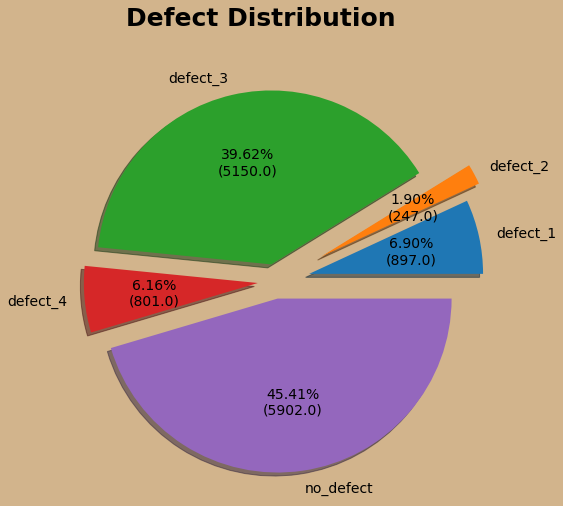

In [16]:
#https://www.askpython.com/python/plot-customize-pie-chart-in-python
defect_1,defect_2,defect_3,defect_4,no_defect=0,0,0,0,0
def func(v,p): #https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
  a=p*sum(v)/100
  return "{:.2f}%\n({:.1f})".format(p,a)
for i in range(len(train)):
  if train['rle_1'][i] != '':
    defect_1+=1
  if train['rle_2'][i] != '':
    defect_2+=1
  if train['rle_3'][i] != '':
    defect_3+=1
  if train['rle_4'][i] != '':
    defect_4+=1
  if train['defect'][i] == 0:
    no_defect+=1
labels=['defect_1','defect_2','defect_3','defect_4','no_defect']
sizes=[defect_1,defect_2,defect_3,defect_4,no_defect]
explode=(0.2,0.3,0.1,0.1,0.1)
fig,ax=plt.subplots(figsize=(16,8))
ax.pie(sizes,explode=explode,labels=labels,textprops={'fontsize': 14},autopct=lambda p: func(sizes,p),shadow=True)
fig.suptitle('Defect Distribution',fontsize=25,fontweight='bold')
fig.set_facecolor("tan")
plt.show()

- The dataset is very imbalanced.
- Data augmentation and resampling techniques will be required to perform the defect detection.

In [17]:
def patch1(bar,ax):
  #https://stackoverflow.com/questions/52080991/display-percentage-above-bar-chart-in-matplotlib
  for p in bar.patches: 
     width=p.get_width()
     height=p.get_height()
     x,y=p.get_xy() 
     ax.annotate('{}'.format(height),(x+width/2,y+height*1.02),ha='center',fontsize=14)

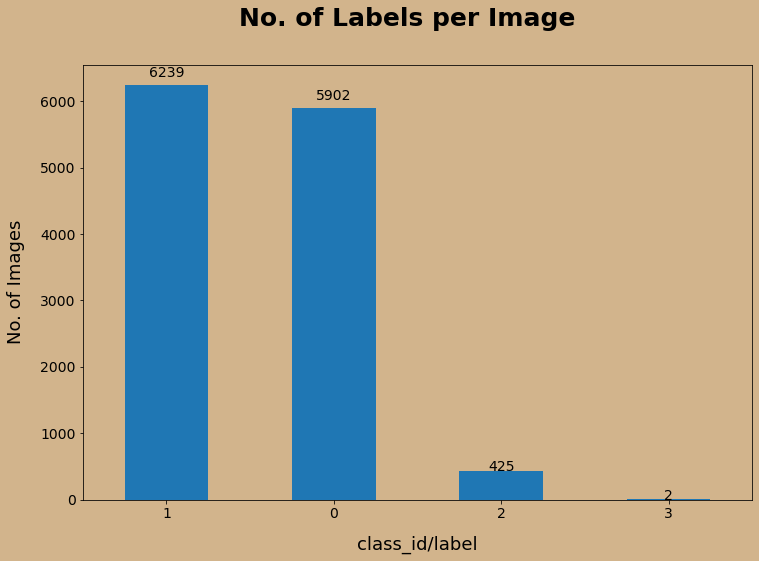

In [18]:
fig,ax=plt.subplots(figsize=(12,8))
a=train['total_defects'].value_counts().plot(kind='bar')
patch1(a,ax) 
ax.set_xlabel("class_id/label",fontsize=18,labelpad=15)
ax.set_ylabel("No. of Images",fontsize=18,labelpad=15)
plt.xticks(rotation='horizontal',fontsize=14)
plt.yticks(fontsize=14)
fig.suptitle('No. of Labels per Image',fontsize=25,fontweight='bold')
ax.set_facecolor("tan")
fig.set_facecolor("tan")
plt.show()

- There are 5902 images with no labels
- There are 6239 images with 1 label
- There are 425 images with 2 labels
- There are 2 images with 3 labels
- Almost half of images doesn't contain any defects
- Most of imagees with defects contain the defects of only one type
- In rare cases an image contains the defects of two diffeerent types.

In [32]:
#https://www.kaggle.com/paulorzp/rle-functions-run-lenght-encode-decode
def rle_to_mask(rle):
    # CONVERT RLE TO MASK 
    if (pd.isnull(rle))|(rle=='')|(rle=='-1'): 
        return np.zeros((256,1600) ,dtype=np.uint8)
    
    height= 256
    width = 1600
    mask= np.zeros( width*height ,dtype=np.uint8)

    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]-1
    lengths = array[1::2]    
    for index, start in enumerate(starts):
        mask[int(start):int(start+lengths[index])]=1
    
    return mask.reshape((height,width),order='F')

In [33]:
def plot_mask(rle_defect, k):
    x = rle_defect.columns[2]
    #Create figure and axes
    fig, ax = plt.subplots(4,2,figsize=(14,9))
    fig.suptitle('Defect_'+str(k)+'_Images', fontsize=20, fontweight='bold')
    for i in range(4):
        image_id = rle_defect['image_id'][i]
        rle=rle_defect[x][i]
        im=Image.open(train_folder_path+'/'+str(image_id))
        ax[i,0].imshow(im)
        ax[i,0].set_title(image_id)
        mask=rle_to_mask(rle)
        ax[i,1].imshow(mask)
        ax[i,1].set_title("Mask for "+str(image_id))
    fig.set_facecolor("tan")
    plt.show()

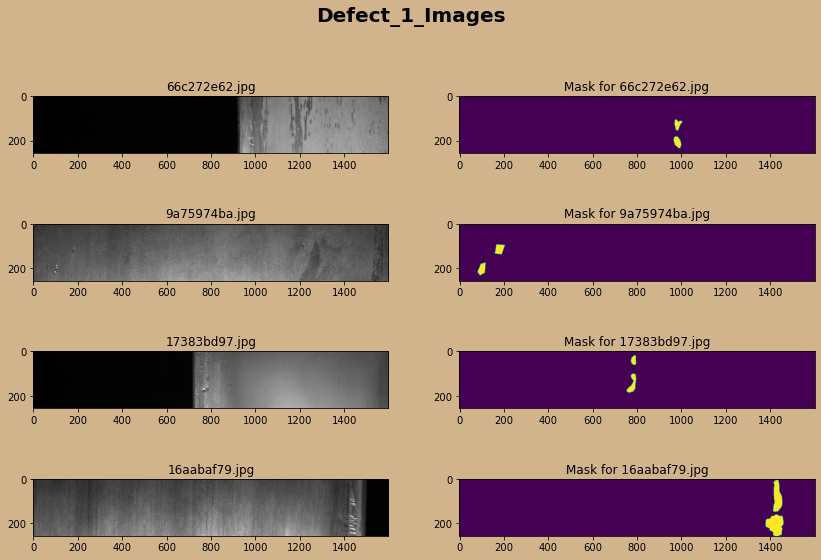

In [34]:
#https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
rle_defect=train[train['defect_1']==1]
rle_defect=rle_defect[['image_id', 'rle_1']]
rle_defect=rle_defect.sample(n=4)
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,1)

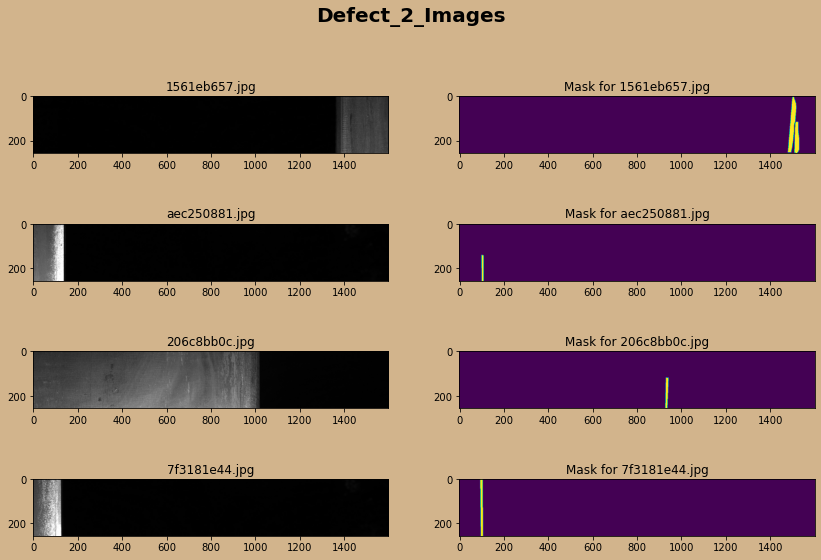

In [36]:
#https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
rle_defect=train[train['defect_2']==1]
rle_defect=rle_defect[['image_id','rle_2']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,2)

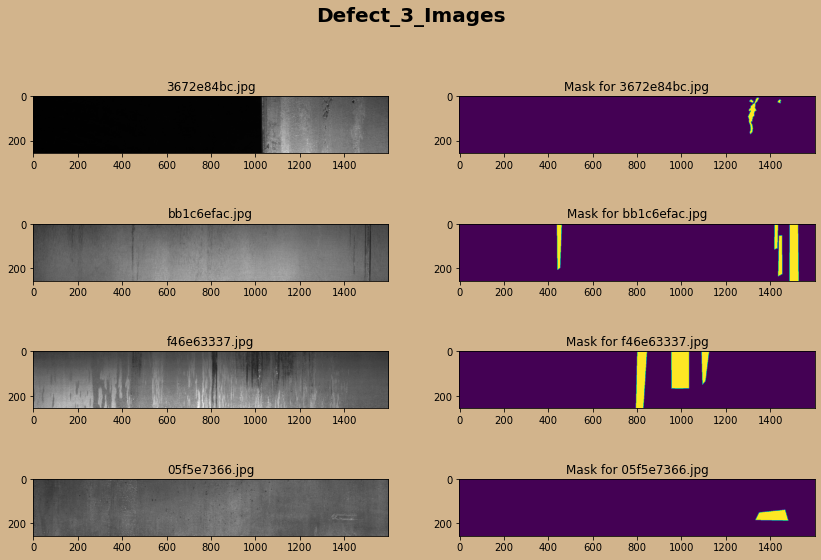

In [37]:
#https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
rle_defect=train[train['defect_3']==1]
rle_defect=rle_defect[['image_id','rle_3']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,3)

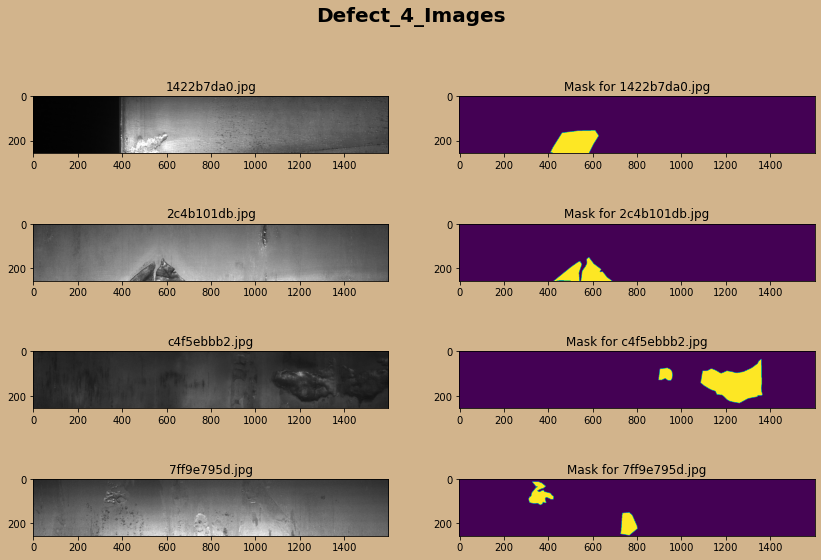

In [38]:
#https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
rle_defect=train[train['defect_4']==1]
rle_defect=rle_defect[['image_id','rle_4']]
rle_defect=rle_defect.sample(n=4) 
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,4)

In [41]:
def mask_areas(rle_defect):
    area=[]
    for i in rle_defect:
        mask=np.sum(rle_to_mask(i))
        area.append(mask)
    return area

In [43]:
rle_defect=train[train['defect_1']==1]
rle_defect=rle_defect['rle_1']
rle_1_area=mask_areas(rle_defect)

rle_defect=train[train['defect_2']==1]
rle_defect=rle_defect['rle_2']
rle_2_area=mask_areas(rle_defect)

rle_defect=train[train['defect_3']==1]
rle_defect=rle_defect['rle_3']
rle_3_area=mask_areas(rle_defect)

rle_defect=train[train['defect_4']==1]
rle_defect=rle_defect['rle_4']
rle_4_area=mask_areas(rle_defect)

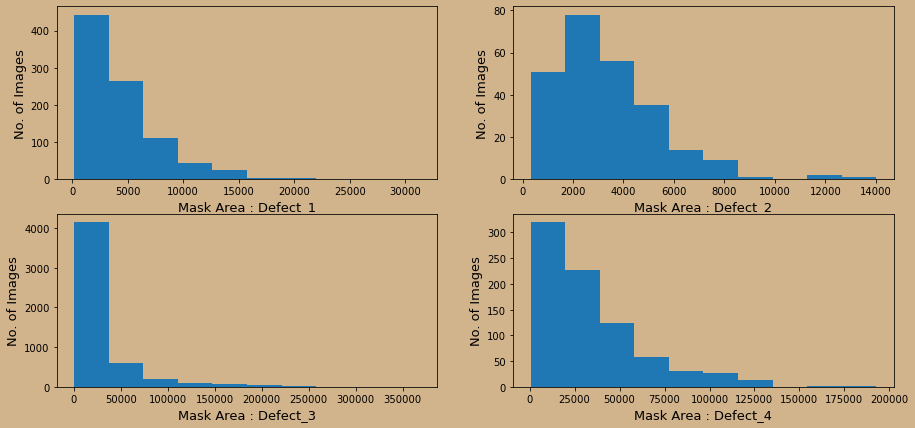

In [44]:
fig,ax=plt.subplots(2,2,figsize=(15,7))

ax[0,0].hist(x=rle_1_area)
ax[0,0].set_xlabel("Mask Area : Defect_1",fontsize=13)
ax[0,0].set_ylabel("No. of Images",fontsize=13)
ax[0,0].set_facecolor("tan")

ax[0,1].hist(x=rle_2_area)
ax[0,1].set_xlabel("Mask Area : Defect_2",fontsize=13)
ax[0,1].set_ylabel("No. of Images",fontsize=13)
ax[0,1].set_facecolor("tan")

ax[1,0].hist(x=rle_3_area)
ax[1,0].set_xlabel("Mask Area : Defect_3",fontsize=13)
ax[1,0].set_ylabel("No. of Images",fontsize=13)
ax[1,0].set_facecolor("tan")

ax[1,1].hist(x=rle_4_area)
ax[1,1].set_xlabel("Mask Area : Defect_4",fontsize=13)
ax[1,1].set_ylabel("No. of Images",fontsize=13)
ax[1,1].set_facecolor("tan")

fig.set_facecolor("tan")
plt.show()

- Mask area for each defect will help to decide area thresholds during segment prediction (later at the time of modelling).

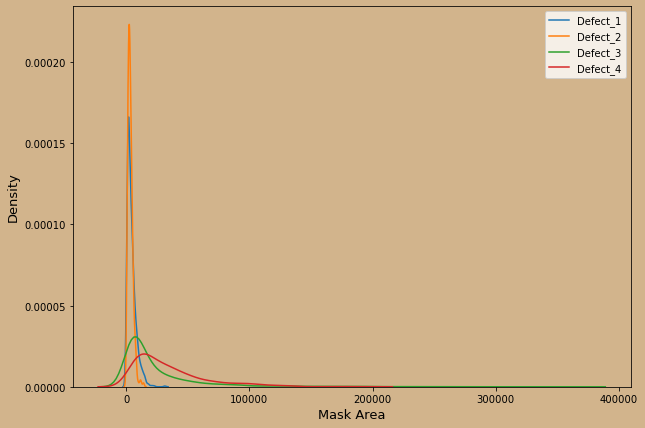

In [45]:
fig,ax=plt.subplots(figsize=(10,7))

sns.kdeplot(rle_1_area,label='Defect_1')
sns.kdeplot(rle_2_area,label='Defect_2')
sns.kdeplot(rle_3_area,label='Defect_3')
sns.kdeplot(rle_4_area,label='Defect_4')
plt.legend()
ax.set_facecolor("tan")
fig.set_facecolor("tan")
plt.ylabel('Density',fontsize=13)
plt.xlabel('Mask Area',fontsize=13)
plt.show()

- Masks with large areas seem very suspicious to me, so I will try to plot few images with large mask areas picked by random index

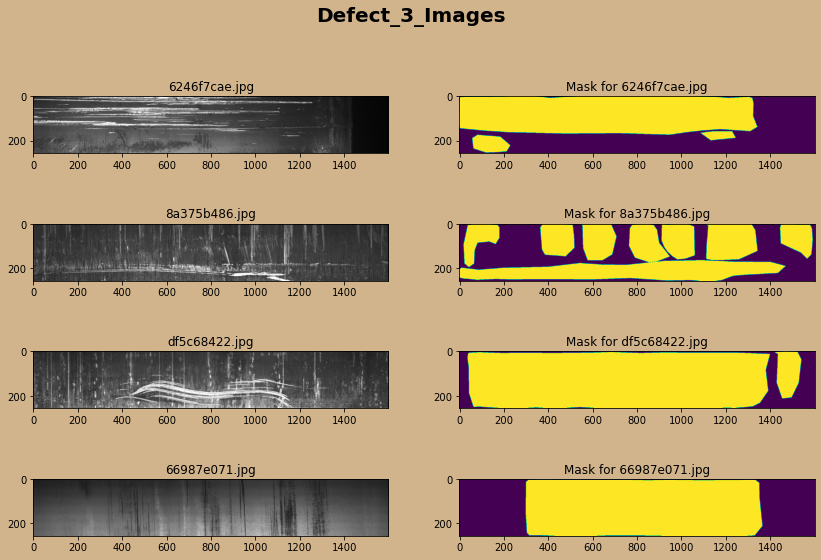

In [47]:
rle_defect=train[train['defect_3']==1]
rle=rle_defect['rle_3']
rle_3_area=mask_areas(rle)
rle_defect['rle_3_area']=rle_3_area
rle_defect=rle_defect[rle_defect['rle_3_area']>200000]
rle_defect=rle_defect[['image_id','rle_3']]
rle_defect=rle_defect.sample(n=4)
rle_defect=rle_defect.reset_index()
plot_mask(rle_defect,3)

- Large masks seem to be okay except for the fact that these masks seem to contain a lot of empty space without any defects